In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sqlite3 as sql
import requests 
from bs4 import BeautifulSoup as bs
from wordcloud import WordCloud, STOPWORDS

In [15]:
URI = "http://api.nobelprize.org/2.1/nobelPrizes"
response = requests.get(URI)
nobel = response.json()

In [45]:

nobel["nobelPrizes"][0]["laureates"][0]["motivation"]["en"]

'in recognition of the extraordinary services he has rendered by the discovery of the laws of chemical dynamics and osmotic pressure in solutions'

In [51]:
words = ""

for prize in nobel["nobelPrizes"]:
    words += prize["laureates"][0]["motivation"]["en"]+ " "

words = words.lower()
words

'in recognition of the extraordinary services he has rendered by the discovery of the laws of chemical dynamics and osmotic pressure in solutions in special recognition of his poetic composition, which gives evidence of lofty idealism, artistic perfection and a rare combination of the qualities of both heart and intellect for his humanitarian efforts to help wounded soldiers and create international understanding in recognition of the extraordinary services he has rendered by the discovery of the remarkable rays subsequently named after him for his work on serum therapy, especially its application against diphtheria, by which he has opened a new road in the domain of medical science and thereby placed in the hands of the physician a victorious weapon against illness and deaths in recognition of the extraordinary services he has rendered by his work on sugar and purine syntheses the greatest living master of the art of historical writing, with special reference to his monumental work, <

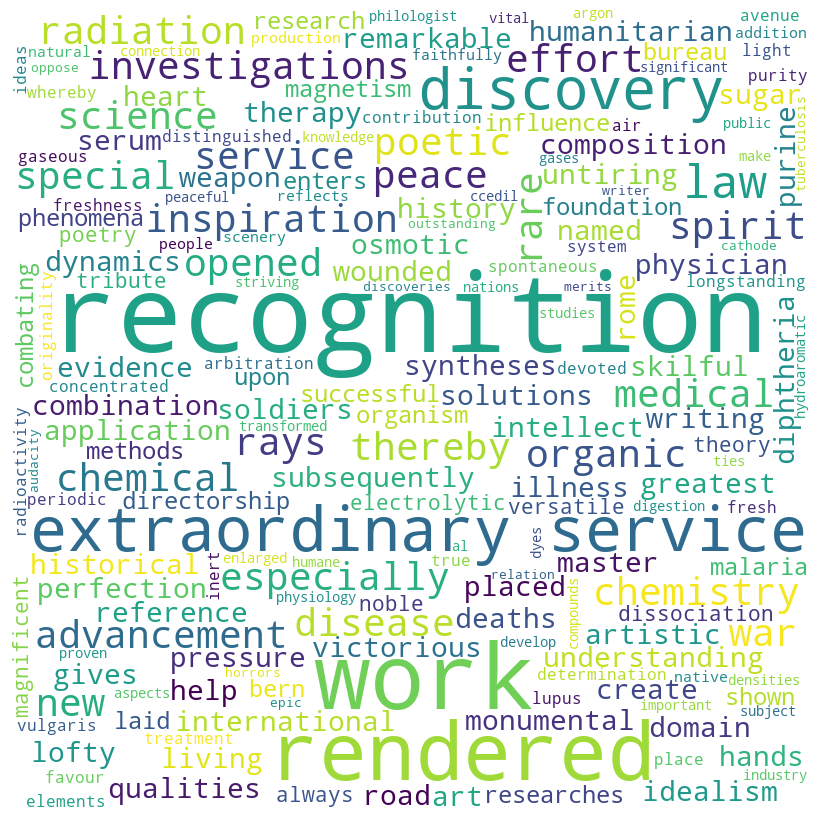

In [53]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [67]:
pages = ["https://books.toscrape.com/catalogue/page-1.html",
        "https://books.toscrape.com/catalogue/page-2.html",
        "https://books.toscrape.com/catalogue/page-3.html"]

# finding links to all book pages
booklinks = []

for page in pages:
    
    r = requests.get(page)
    html = bs(r.content)
    books = html.find_all(class_ = "image_container")
    
    for tag in books:
        booklinks.append("https://books.toscrape.com/catalogue/" + tag.find("a").attrs["href"])

In [160]:
booklinks

['https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html',
 'https://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html',
 'https://books.toscrape.com/catalogue/soumission_998/index.html',
 'https://books.toscrape.com/catalogue/sharp-objects_997/index.html',
 'https://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/index.html',
 'https://books.toscrape.com/catalogue/the-requiem-red_995/index.html',
 'https://books.toscrape.com/catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html',
 'https://books.toscrape.com/catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html',
 'https://books.toscrape.com/catalogue/the-boys-in-the-boat-nine-americans-and-their-epic-quest-for-gold-at-the-1936-berlin-olympics_992/index.html',
 'https://books.toscrape.com/catalogue/the-black-maria_991/index.html',
 'https://books.toscrape.com/catalogue/starving-hearts-triangular-trade-tr

In [159]:
book_df = pd.DataFrame(columns = ["upc","title","price","rating"])
for link in booklinks:
    r = requests.get(link)
    book_html = bs(r.content)
    
    book_info = {}
    
    upc = book_html.find_all(name = "th", string = "UPC")[0]\
            .find_next_sibling().string
    
    
    temp = book_html.find(name = "div", class_="col-sm-6 product_main")
    
    title = temp.find(name = "h1").string
    price = temp.find(name = "p", class_ = "price_color").string
    rating = temp.find(class_ = r"star-rating").attrs["class"][1]
    
    book_df.loc[len(book_df)] = [upc, title, price, rating]
    
    

In [162]:
book_df.head()

,upc,title,price,rating
0,a897fe39b1053632,A Light in the Attic,£51.77,Three
1,90fa61229261140a,Tipping the Velvet,£53.74,One
2,6957f44c3847a760,Soumission,£50.10,One
3,e00eb4fd7b871a48,Sharp Objects,£47.82,Four
4,4165285e1663650f,Sapiens: A Brief History of Humankind,£54.23,Five
